# Introduction to Statistics in Python
Run the hidden code cell below to import the data used in this course.

In [49]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

# Importing the course datasets
deals = pd.read_csv("datasets/amir_deals.csv")
happiness = pd.read_csv("datasets/world_happiness.csv")
food = pd.read_csv("datasets/food_consumption.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

**Types of statistics**

- Descriptive statistics focuses on describing and summarizing the data at hand.
- Inferential statistics uses the data at hand, which is called sample data, to make inferences about a larger population.

**Types of data**



_Add your notes here_

In [50]:
# Add your code snippets here

# Measures of center

In [51]:
import pandas as pd

In [52]:
food_consumption = pd.read_csv("datasets/food_consumption.csv")

In [53]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption.query('country == "Belgium"')

# Filter for USA
usa_consumption = food_consumption.query('country == "USA"')

# Calculate mean and median consumption in Belgium
print(be_consumption['consumption'].mean())
print(be_consumption['consumption'].median())

# Calculate mean and median consumption in USA
print(usa_consumption['consumption'].mean())
print(usa_consumption['consumption'].median())

42.13272727272727
12.59
44.650000000000006
14.58


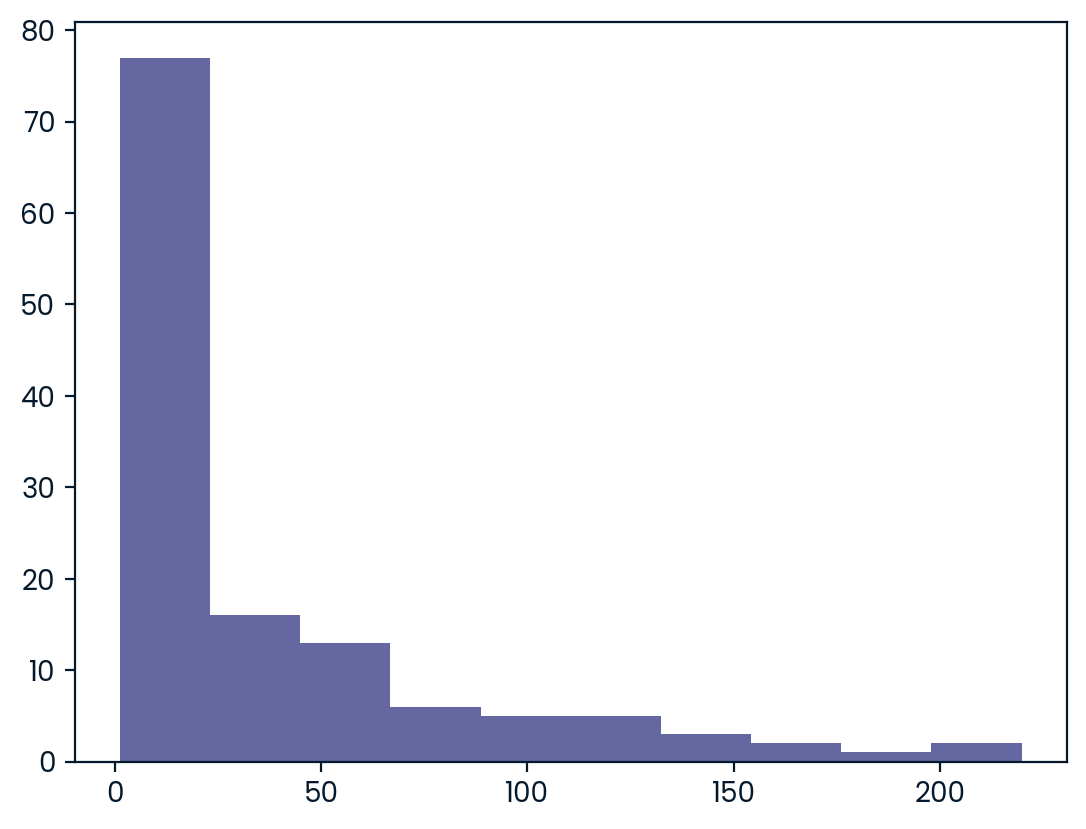

In [54]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [55]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean,np.median]))

#Considerando a distorção desses dados, qual medida de tendência central resume melhor os quilogramas de emissões de CO2 por pessoa por ano para o arroz? Mediana

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


# Measures of spread

Without ddof = 1 , population variance is calculated instead of sample variance

Outlier: Data point that is substantially different from the others

# Quantile

In [56]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.25,0.50,0.75,1]))

# Calculate the deciles of co2_emission
print(print(np.quantile(food_consumption['co2_emission'], [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1])))

[   0.        5.21     16.53     62.5975 1712.    ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]
None


# Variance & SD

(array([50., 25., 21., 17.,  6.,  7.,  2.,  1.,  0.,  1.]),
 array([  24.07 ,  192.863,  361.656,  530.449,  699.242,  868.035,
        1036.828, 1205.621, 1374.414, 1543.207, 1712.   ]),
 <BarContainer object of 10 artists>)

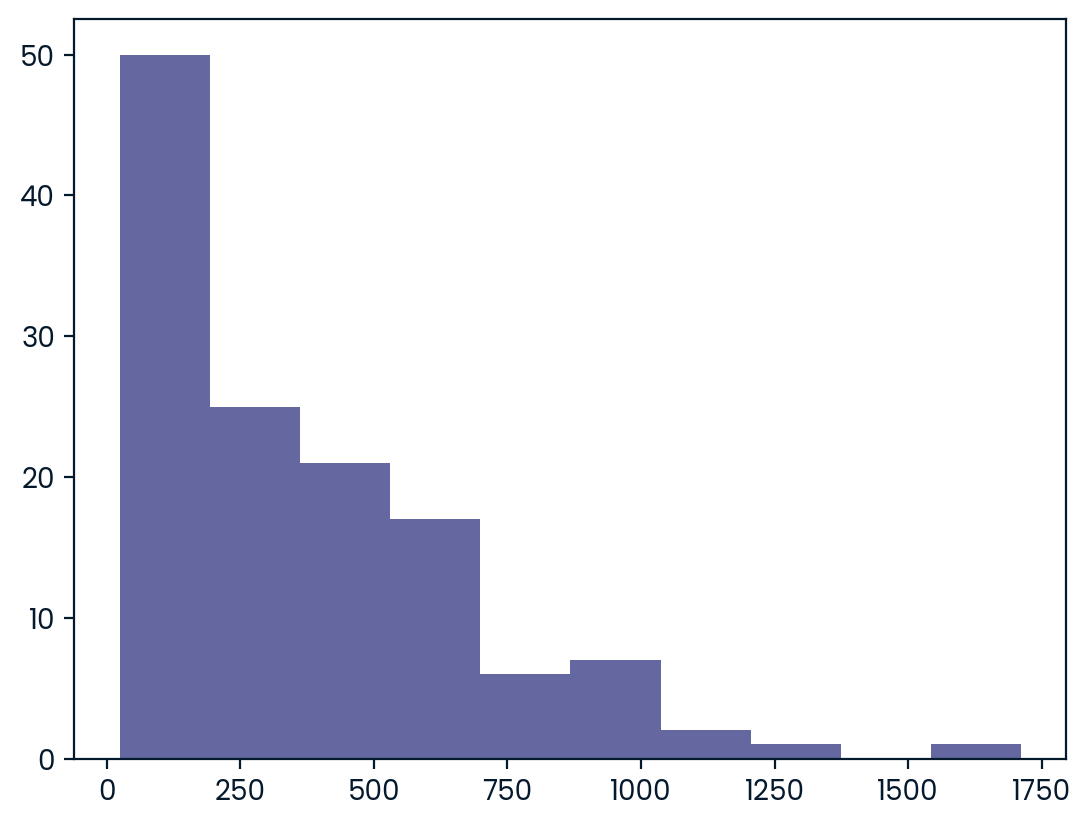

In [57]:
# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption.query('food_category == "beef"')['co2_emission'] )

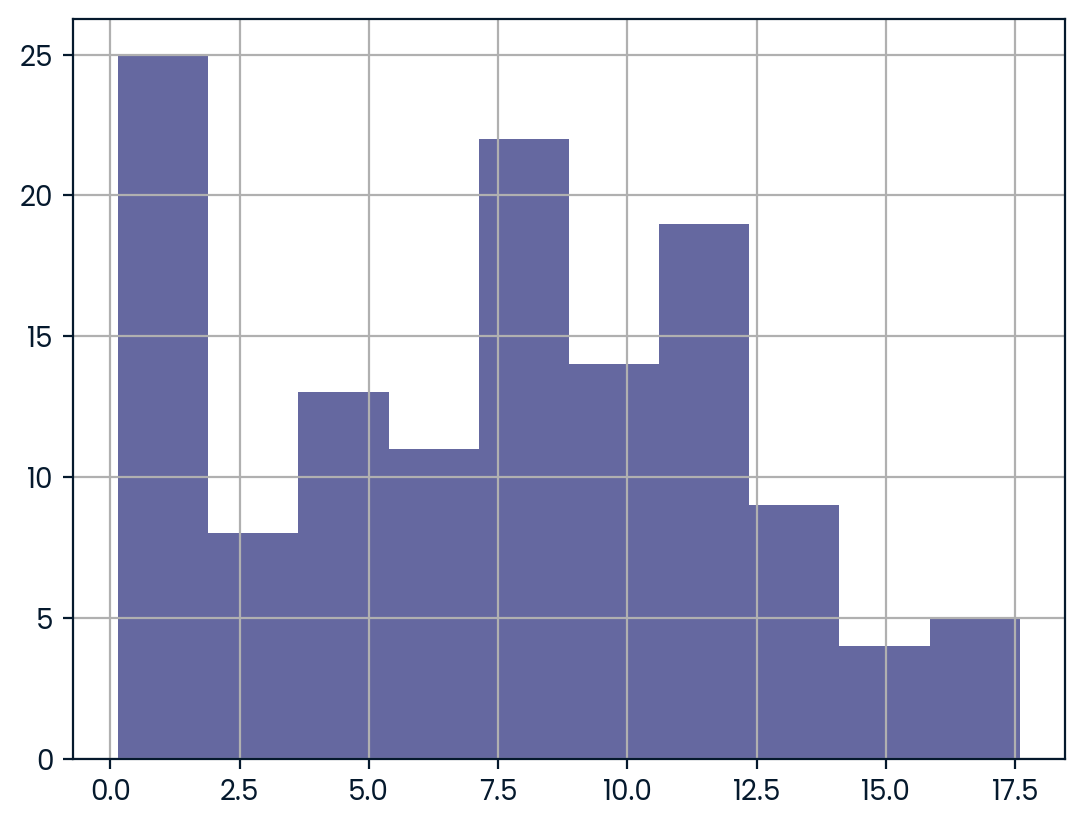

In [58]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

# IQR

In [59]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,[0.25])
q3 = np.quantile(emissions_by_country,[0.75])
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [60]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper[0]) | (emissions_by_country < lower[0])]

print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# Probability

In [61]:
amir_deals = pd.read_csv("datasets/amir_deals.csv")

In [62]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [63]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [64]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5,replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


# Discrete distributions


Discrete distributions are statistical distributions that describe the probability of outcomes of a discrete random variable. A discrete random variable is one that can take on a finite or countably infinite set of values.

In [65]:
restaurant_groups = pd.DataFrame({'group_id':['A','B','C','D','E','F','G','H','I','J'],
                                  'group_size':[2,4,6,2,2,2,3,2,4,2]})

In [66]:
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


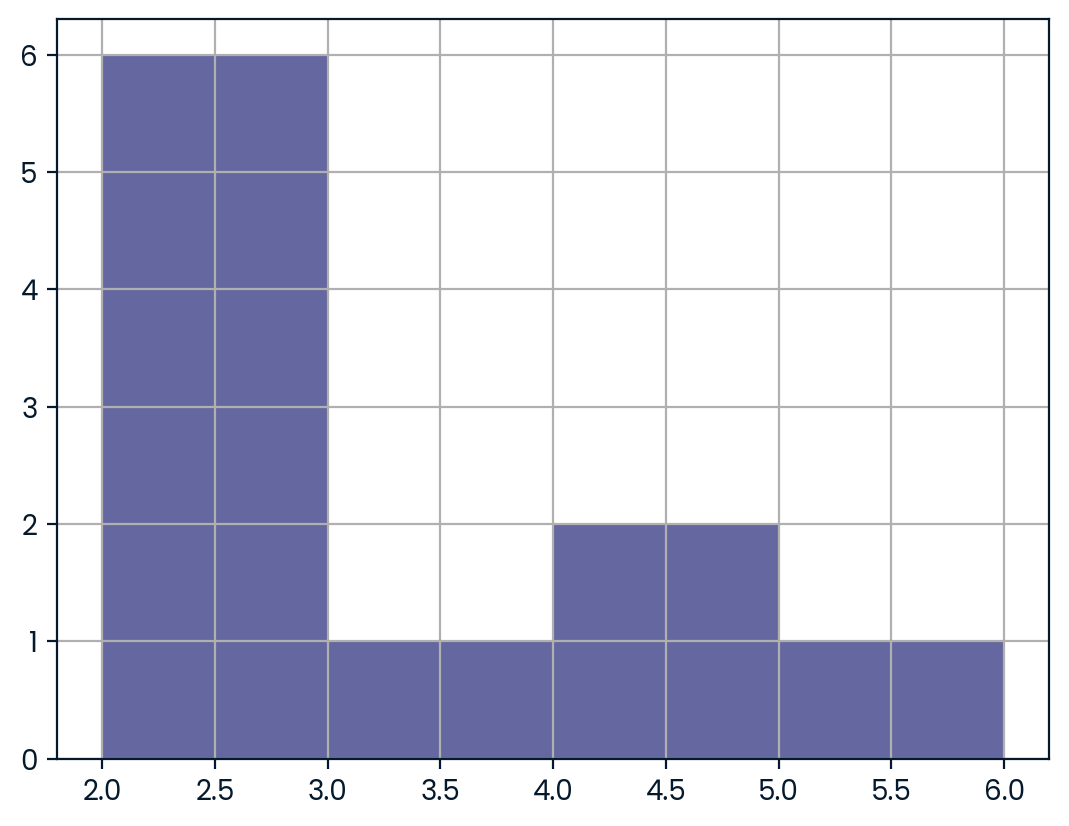

In [67]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins= [2,3,4,5,6])
plt.show()

In [68]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [69]:
# Calculate expected value
expected_value = (size_dist['group_size']*size_dist['prob']).sum()
print(expected_value)

2.9000000000000004


In [70]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


# Continuous distributions

Continuous distributions describe the probabilities of the possible values of a continuous random variable, which can take any value within a given range or interval. Unlike discrete distributions, where the variable takes specific, separate values, continuous distributions deal with variables that can assume an infinite number of values within a certain range.

In [71]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

`uniform.cdf(x, loc, scale)`

- x: The value at which to evaluate the CDF.
- loc: The lower bound of the uniform distribution (parameter a).
- scale: The difference between the upper and lower bounds of the uniform distribution (parameter 𝑏 : b−a).

In [72]:
# Import uniform from scipy.stats
from scipy.stats import uniform 

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

0.16666666666666666


In [73]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(25,0,30)
print(prob_greater_than_5)

0.8333333333333334


In [74]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 =uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


The uniform.rvs function in the scipy.stats module is used to generate random variates (random numbers) from a uniform distribution. This is useful when you want to simulate random values that are uniformly distributed within a specified range.

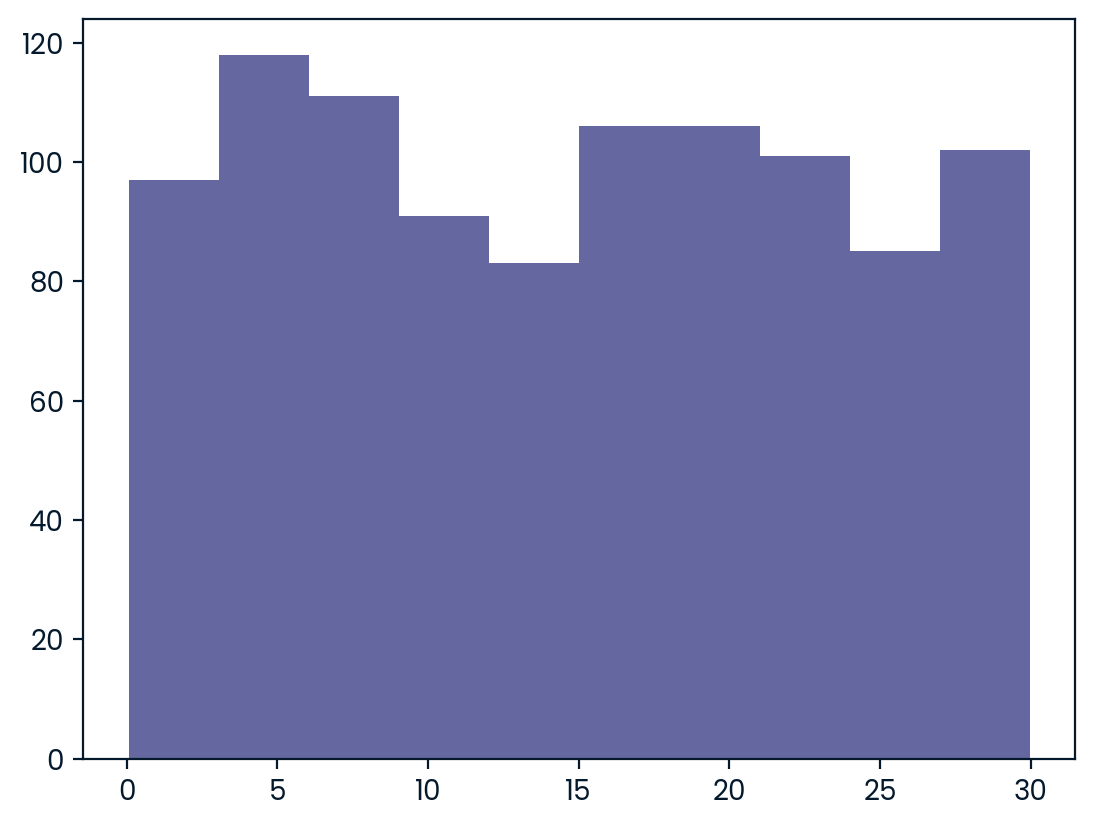

In [75]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

# The binomial distribution


The binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent Bernoulli trials. Each trial has only two possible outcomes: success (often denoted as 1) and failure (often denoted as 0). 

- Number of Trials (𝑛): The total number of independent trials or experiments.
- Probability of Success (p): The probability of success on each individual trial.

`binom.rvs(n,p,size=)`

- n: The number of trials or experiments.
- p: The probability of success on each trial.
- size: The number of random variates to generate (optional; if not specified, a single value is generated).

In [76]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.30, size=1))

[1]


In [77]:
# Simulate 1 week of 3 deals
print(binom.rvs(3,0.30,size = 1))

[0]


In [78]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.30,size=52)

# Print mean deals won per week
print(deals.mean())

0.8461538461538461


The PMF gives the probability of observing exactly k successes in n independent Bernoulli trials, each with a success probability p.

`binom.pmf(k,n,p)`

In [79]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


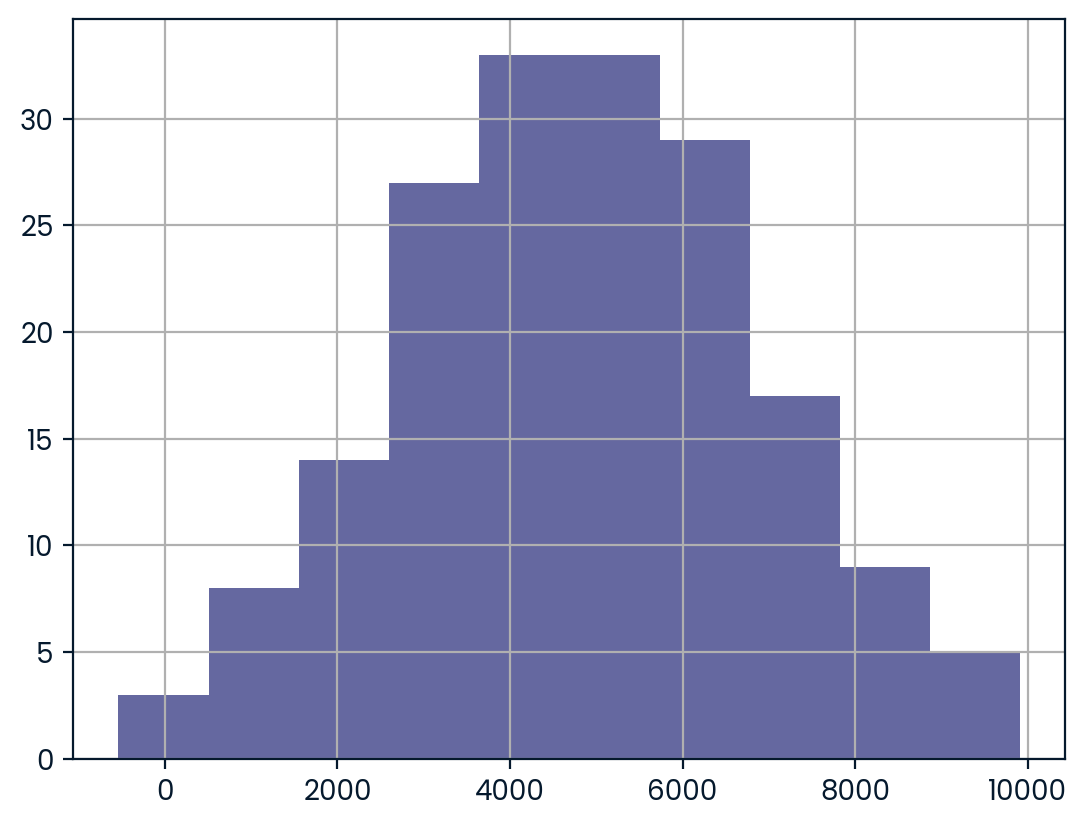

In [80]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

# The normal distribution

- symmetrical
- curve nerver hits 0
- Standard normal distribution: mean = 0 & std = 1

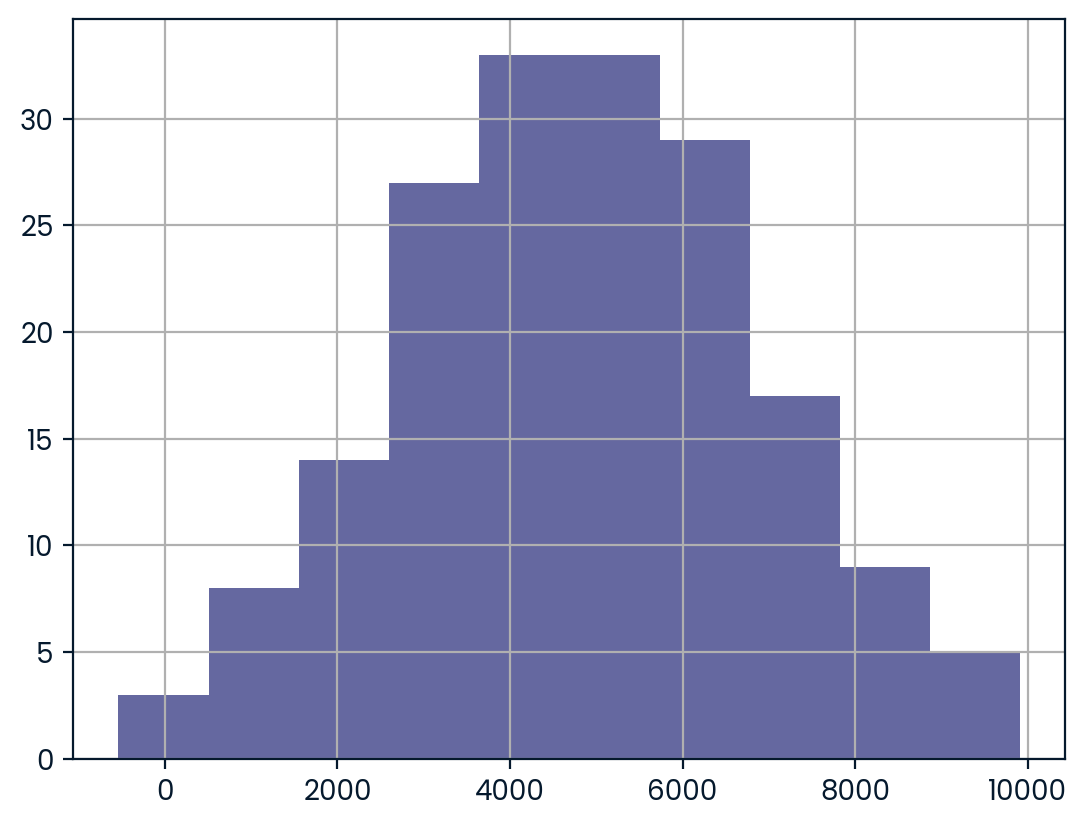

In [81]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

In [82]:
from scipy.stats import norm

`norm.cdf(x,m,s)`

- x: O valor para o qual deseja calcular a probabilidade acumulada (requerido).
- m: Média da distribuição (opcional, padrão = 0).
- s: Desvio padrão da distribuição (opcional, padrão = 1)

In [83]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


In [84]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


In [85]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


`norm.ppf(q,m,s)`

- q: A probabilidade (ou percentil) para a qual você deseja encontrar o valor correspondente (requerido).
- m: Média da distribuição (opcional, padrão = 0).
- s: Desvio padrão da distribuição (opcional, padrão = 1)

Ela calcula o Percent-Point Function (PPF), também conhecida como a função quantílica inversa. Isso significa que, dado um valor de probabilidade (percentil), ela retorna o valor correspondente na distribuição normal.

In [86]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


`norm.rvs(m,s,size=)`

- m: Média da distribuição normal (μ) (opcional, padrão = 0).
- s: Desvio padrão da distribuição normal (σ) (opcional, padrão = 1).
- size: O número de amostras ou o formato do array de amostras que você deseja gerar (opcional, padrão = 1).

A função norm.rvs do módulo scipy.stats é usada para gerar valores aleatórios seguindo uma distribuição normal.

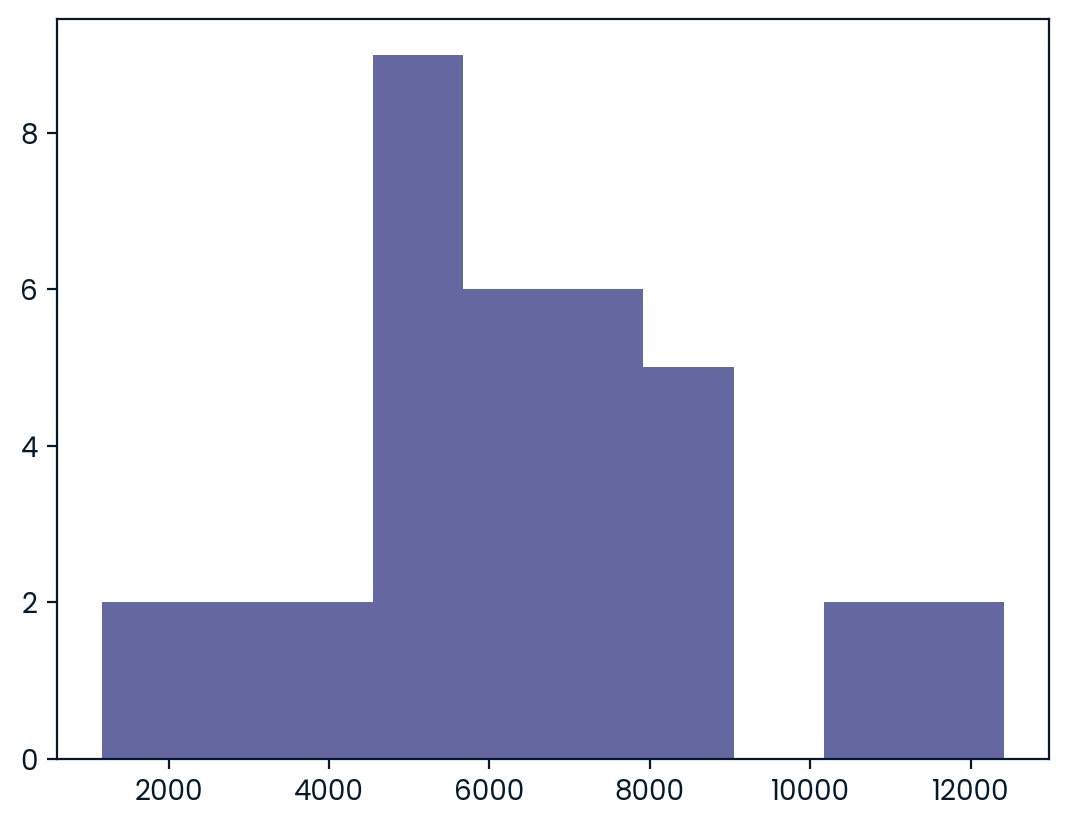

In [87]:
# Calculate new average amount
new_mean = 6000

# Calculate new standard deviation
new_sd = 2600

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

In [88]:
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


In [89]:
prob_over_1000_new = 1 - norm.cdf(1000,6000,2600)

print(prob_over_1000_new)

# Amir's performance is practically the same in both markets.      

0.9727648049862613


# The Poisson distribution

Events appear to happen at a certain rate,but completely at random.

Examples
1. Number of animals adopted from ananimal shelter per week
2. Number of people arriving at arestaurant per hour
3. Number of earthquakes in California peryear

- Probability of some # of events occurring over a fixed period of time

Examples
1. Probability of ≥ 5 animals adopted from an animal shelter per week
2. Probability of 12 people arriving at a restaurant per hour
3. Probability of < 20 earthquakes in California per year


Lambda (λ)

- λ = average number of events per time interval
- Average number of adoptions per week = 8
- Lambda is the distribution's peak



In [90]:
from scipy.stats import poisson

In [91]:
# A probabilidade de Amir responder a 5 leads em um dia, considerando que ele responde a uma média de 4.

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


In [92]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


In [93]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


# Exponential distribution

Probability of time between Poisson events

- Examples
1. Probability of > 1 day between adoptions
2. Probability of < 10 minutes between restaurant arrivals
3. Probability of 6-8 months between earthquakes
- Also uses lambda (rate)
- Continuous (time)


In [94]:
# Import expon from scipy.stats
from scipy.stats import expon

In [95]:
# What is the probability that it will take Amir less than an hour to respond to a lead?

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


# Correlation

In [97]:
import seaborn as sns

In [99]:
world_happiness = pd.read_csv("datasets/world_happiness.csv")

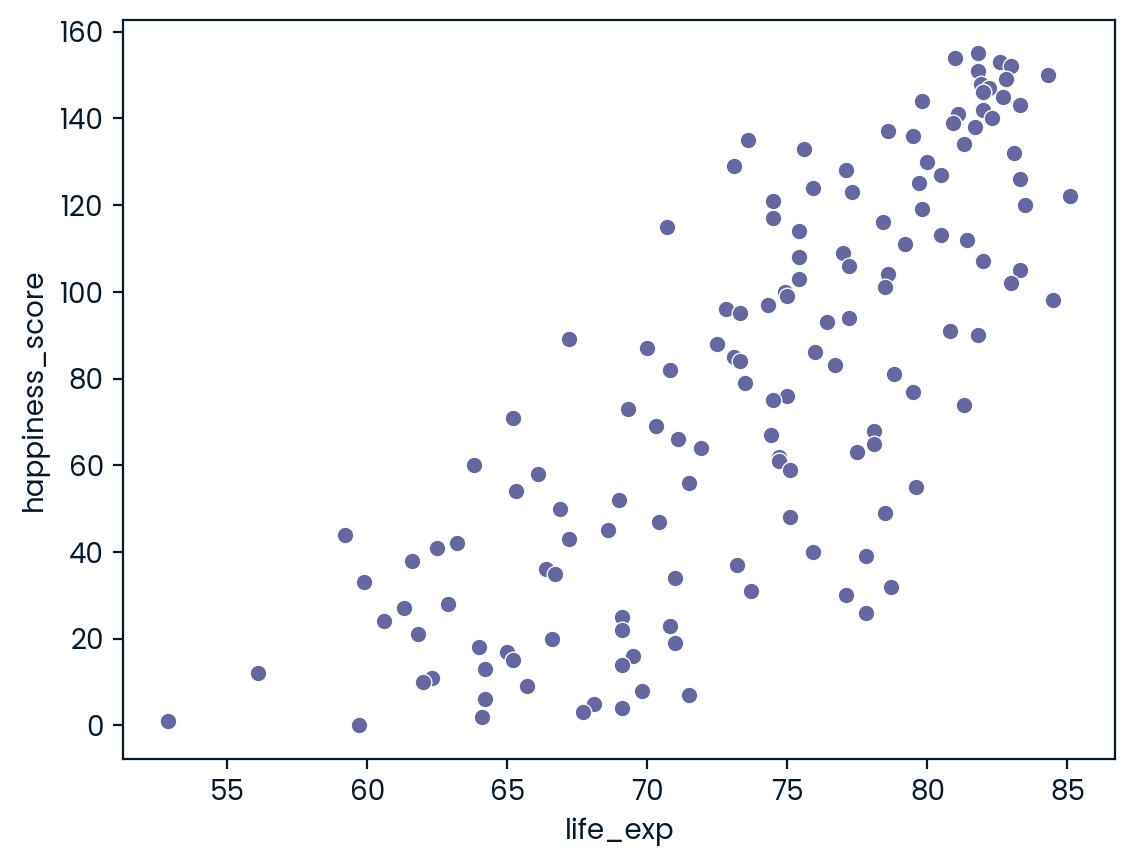

In [100]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp',y='happiness_score',data=world_happiness)

# Show plot
plt.show()

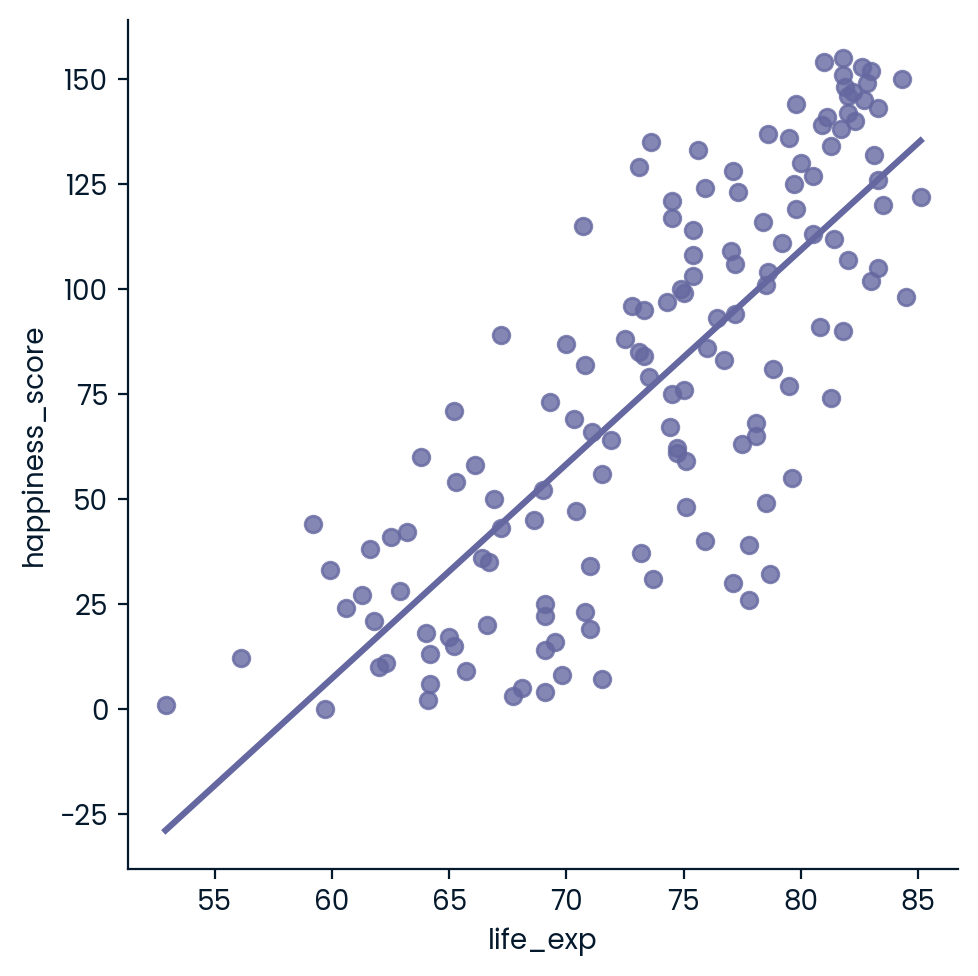

In [101]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp',y='happiness_score',data=world_happiness,ci=None)

# Show plot
plt.show()

In [102]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062
